In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale, minmax_scale, robust_scale
%matplotlib inline
import matplotlib
# 음수 표시
matplotlib.rc('axes', unicode_minus=False)


# 데이터 정제

In [4]:
df_raw = pd.read_csv("C:/Users/USER/Desktop/포스코 청년 아카데미_B4_김민경/데이터 분석1/분석자료/FITNESS_결측.csv",encoding='euc-kr')
df_raw.head()

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,Donna,여성,42,40대,68.15,59.571,8.17,166,40,172
1,Gracie,NaN,38,30대,81.87,60.055,8.63,170,48,186
2,Luanne,여성,43,40대,85.84,54.297,8.65,156,45,168
3,Mimi,여성,50,50대,70.87,54.625,8.92,146,48,155
4,Chris,남성,49,40대,NaN,49.156,8.95,180,44,185


In [121]:
df_raw.isnull().head()

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False


In [122]:
df_raw.isna().head()

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False


In [123]:
df_raw.isnull().sum()

NAME        0
GENDER      1
AGE         0
AGEGROUP    0
WEIGHT      2
OXY         0
RUNTIME     0
RUNPULSE    0
RSTPULSE    0
MAXPULSE    0
dtype: int64

In [124]:
df_raw['GENDER'].fillna('여성', inplace = True)
df_raw.head()

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,Donna,여성,42,40대,68.15,59.571,8.17,166,40,172
1,Gracie,여성,38,30대,81.87,60.055,8.63,170,48,186
2,Luanne,여성,43,40대,85.84,54.297,8.65,156,45,168
3,Mimi,여성,50,50대,70.87,54.625,8.92,146,48,155
4,Chris,남성,49,40대,NaN,49.156,8.95,180,44,185


In [125]:
df_raw.groupby('GENDER')['WEIGHT'].agg('mean')

GENDER
남성    82.433077
여성    72.908750
Name: WEIGHT, dtype: float64

In [126]:
df_raw['WEIGHT']=\
df_raw['WEIGHT'].fillna(df_raw.groupby('GENDER')['WEIGHT'].transform('mean')).round(3)
df_raw.head()

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,Donna,여성,42,40대,68.150,59.571,8.17,166,40,172
1,Gracie,여성,38,30대,81.870,60.055,8.63,170,48,186
2,Luanne,여성,43,40대,85.840,54.297,8.65,156,45,168
3,Mimi,여성,50,50대,70.870,54.625,8.92,146,48,155
4,Chris,남성,49,40대,82.433,49.156,8.95,180,44,185


<AxesSubplot:>

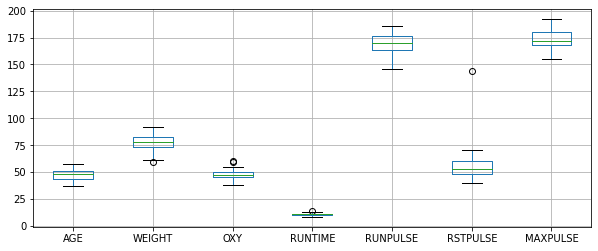

In [127]:
df_raw.boxplot(figsize = (10,4))

In [129]:
df_raw['RSTPULSE'] >=100
df_raw.loc[27:29]

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
27,Mark,남성,57,50대,73.37,39.407,12.63,174,58,176
28,Steve,남성,54,50대,91.63,39.203,12.88,168,144,172
29,Vaughn,남성,44,40대,81.42,39.442,13.08,174,63,176


In [105]:
df_raw[(df_raw['RSTPULSE']>=100)]

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
28,Steve,남성,54,50대,91.63,39.203,12.88,168,144,172


In [106]:
df_fitness = df_raw[df_raw['RSTPULSE']< 100]
df_fitness

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,Donna,여성,42,40대,68.150,59.571,8.17,166,40,172
1,Gracie,여성,38,30대,81.870,60.055,8.63,170,48,186
2,Luanne,여성,43,40대,85.840,54.297,8.65,156,45,168
3,Mimi,여성,50,50대,70.870,54.625,8.92,146,48,155
4,Chris,남성,49,40대,82.433,49.156,8.95,180,44,185
5,Allen,남성,38,30대,89.020,49.874,9.22,178,55,180
6,Nancy,여성,49,40대,76.320,48.673,9.40,186,56,188
7,Patty,여성,52,50대,76.320,45.441,9.63,164,48,166
8,Suzanne,여성,57,50대,59.080,50.545,9.93,148,49,155
9,Teresa,여성,51,50대,77.910,46.672,10.00,162,48,168


In [107]:
df_fitness.reset_index(drop = True, inplace = True)
df_fitness

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,Donna,여성,42,40대,68.150,59.571,8.17,166,40,172
1,Gracie,여성,38,30대,81.870,60.055,8.63,170,48,186
2,Luanne,여성,43,40대,85.840,54.297,8.65,156,45,168
3,Mimi,여성,50,50대,70.870,54.625,8.92,146,48,155
4,Chris,남성,49,40대,82.433,49.156,8.95,180,44,185
5,Allen,남성,38,30대,89.020,49.874,9.22,178,55,180
6,Nancy,여성,49,40대,76.320,48.673,9.40,186,56,188
7,Patty,여성,52,50대,76.320,45.441,9.63,164,48,166
8,Suzanne,여성,57,50대,59.080,50.545,9.93,148,49,155
9,Teresa,여성,51,50대,77.910,46.672,10.00,162,48,168


In [130]:
df_fitness_num = df_fitness.select_dtypes(exclude = 'object')
df_fitness_num.head()

,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,42,68.150,59.571,8.17,166,40,172
1,38,81.870,60.055,8.63,170,48,186
2,43,85.840,54.297,8.65,156,45,168
3,50,70.870,54.625,8.92,146,48,155
4,49,82.433,49.156,8.95,180,44,185


In [131]:
df_fitness_char = df_fitness.select_dtypes(include = 'object')
df_fitness_char.head()

,NAME,GENDER,AGEGROUP
0,Donna,여성,40대
1,Gracie,여성,30대
2,Luanne,여성,40대
3,Mimi,여성,50대
4,Chris,남성,40대


In [132]:
df_scale_std = scale(df_fitness_num)
df_scale_std = pd.DataFrame(df_scale_std, columns= df_fitness_num.columns)
df_scale_std.head()

,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,-0.805985,-1.119445,2.334717,-1.771826,-0.361066,-1.856653,-0.200185
1,-1.506841,0.606869,2.429494,-1.423469,0.029276,-0.777726,1.328503
2,-0.630771,1.106393,1.301962,-1.408323,-1.336919,-1.182324,-0.636953
3,0.595728,-0.777202,1.366191,-1.203852,-2.312773,-0.777726,-2.056450
4,0.420514,0.677708,0.295251,-1.181133,1.005129,-1.317190,1.219311


In [133]:
df_scale_desc = df_scale_std.describe()
df_scale_desc.round(3)

,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
count,30.000,30.000,30.000,30.000,30.000,30.000,30.000
mean,-0.000,0.000,0.000,0.000,0.000,0.000,-0.000
std,1.017,1.017,1.017,1.017,1.017,1.017,1.017
min,-1.682,-2.261,-2.009,-1.772,-2.313,-1.857,-2.056
25%,-0.631,-0.495,-0.486,-0.609,-0.703,-0.778,-0.637
50%,0.158,-0.020,-0.122,-0.083,0.029,-0.171,-0.200
75%,0.771,0.678,0.511,0.491,0.615,0.672,0.673
max,1.822,1.835,2.429,2.666,1.591,2.189,1.984


In [134]:
df_scale_minmax = minmax_scale(df_fitness_num)
df_scale_minmax = pd.DataFrame(df_scale_minmax, columns= df_fitness_num.columns)
df_scale_minmax.head()

,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,0.25,0.278648,0.978647,0.000000,0.50,0.000000,0.459459
1,0.05,0.700154,1.000000,0.078498,0.60,0.266667,0.837838
2,0.30,0.822120,0.745974,0.081911,0.25,0.166667,0.351351
3,0.65,0.362212,0.760445,0.127986,0.00,0.266667,0.000000
4,0.60,0.717450,0.519169,0.133106,0.85,0.133333,0.810811


In [135]:
df_scale_desc = df_scale_minmax.describe()
df_scale_desc.round(3)

,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
count,30.000,30.000,30.000,30.000,30.000,30.000,30.000
mean,0.480,0.552,0.453,0.399,0.592,0.459,0.509
std,0.290,0.248,0.229,0.229,0.261,0.251,0.252
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.300,0.431,0.343,0.262,0.412,0.267,0.351
50%,0.525,0.547,0.425,0.381,0.600,0.417,0.459
75%,0.700,0.717,0.568,0.510,0.750,0.625,0.676
max,1.000,1.000,1.000,1.000,1.000,1.000,1.000


In [136]:
df_scale_robust = robust_scale(df_fitness_num)
df_scale_robust = pd.DataFrame(df_scale_robust, columns= df_fitness_num.columns)
df_scale_robust.head()

,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,-0.6875,-0.937433,2.463797,-1.535284,-0.296296,-1.162791,0.000000
1,-1.1875,0.534986,2.558834,-1.218589,0.000000,-0.418605,1.166667
2,-0.5625,0.961043,1.428207,-1.204819,-1.037037,-0.697674,-0.333333
3,0.3125,-0.645525,1.492612,-1.018933,-1.777778,-0.418605,-1.416667
4,0.1875,0.595407,0.418733,-0.998279,0.740741,-0.790698,1.083333


In [137]:
df_scale_desc = df_scale_robust.describe()
df_scale_desc.round(3)

,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
count,30.000,30.000,30.000,30.000,30.000,30.000,30.000
mean,-0.112,0.017,0.123,0.076,-0.022,0.118,0.153
std,0.726,0.868,1.020,0.925,0.772,0.702,0.776
min,-1.312,-1.911,-1.892,-1.535,-1.778,-1.163,-1.417
25%,-0.562,-0.405,-0.365,-0.478,-0.556,-0.419,-0.333
50%,0.000,0.000,0.000,0.000,0.000,0.000,0.000
75%,0.438,0.595,0.635,0.522,0.444,0.581,0.667
max,1.188,1.582,2.559,2.499,1.185,1.628,1.667


In [138]:
df_rstpulse = pd.DataFrame()
df_rstpulse["Raw"] = df_fitness_num["RSTPULSE"]  #df_fitness 사용 가능(동일)
df_rstpulse["Standard"] = df_scale_std["RSTPULSE"]
df_rstpulse["MinMax"] = df_scale_minmax["RSTPULSE"]
df_rstpulse["Robust"] = df_scale_robust["RSTPULSE"]
df_rstpulse.head().round(3)

,Raw,Standard,MinMax,Robust
0,40,-1.857,0.000,-1.163
1,48,-0.778,0.267,-0.419
2,45,-1.182,0.167,-0.698
3,48,-0.778,0.267,-0.419
4,44,-1.317,0.133,-0.791


In [117]:
df_rstpulse.describe().round(3)

,Raw,Standard,MinMax,Robust
count,30.000,30.000,30.000,30.000
mean,53.767,0.000,0.459,0.118
std,7.542,1.017,0.251,0.702
min,40.000,-1.857,0.000,-1.163
25%,48.000,-0.778,0.267,-0.419
50%,52.500,-0.171,0.417,0.000
75%,58.750,0.672,0.625,0.581
max,70.000,2.189,1.000,1.628


array([[<AxesSubplot:title={'center':'Raw'}>,
        <AxesSubplot:title={'center':'Standard'}>],
       [<AxesSubplot:title={'center':'MinMax'}>,
        <AxesSubplot:title={'center':'Robust'}>]], dtype=object)

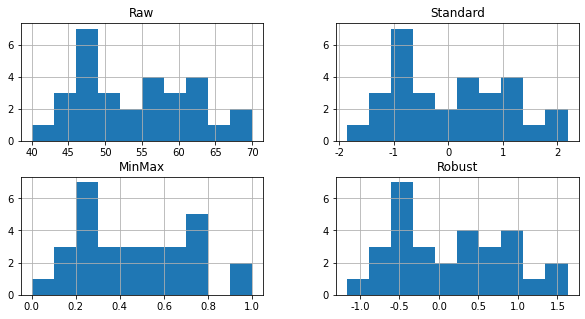

In [118]:
# pandas의 DataFrame.hist 이용(figsize = (x축 크기, y축 크기)
df_rstpulse[["Raw","Standard","MinMax","Robust"]].hist(figsize = (10,5))

# 탐색적 분석

### 그래프 분석 - bar chart

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
matplotlib.rc('font', family = 'Malgun Gothic')

In [60]:
df_fitness = pd.read_csv("C:/Users/USER/Desktop/포스코 청년 아카데미_B4_김민경/데이터 분석1/분석자료/FITNESS.csv",encoding='euc-kr')
df_fitness.head()

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,Donna,여성,42,40대,68.15,59.571,8.17,166,40,172
1,Gracie,여성,38,30대,81.87,60.055,8.63,170,48,186
2,Luanne,여성,43,40대,85.84,54.297,8.65,156,45,168
3,Mimi,여성,50,50대,70.87,54.625,8.92,146,48,155
4,Chris,남성,49,40대,81.42,49.156,8.95,180,44,185


In [11]:
df_currency =pd.read_csv('C:/Users/USER/Desktop/포스코 청년 아카데미_B4_김민경/데이터 분석1/분석자료/환율.csv',encoding='euc-kr',parse_dates = ['APPL_DATE'])
df_currency.head()

,CURRENCY,APPL_DATE,STD_RATE,USD_CONV_DATE
0,CNY,2016-01-01,181.48,0.1541
1,JPY,2016-01-01,976.99,0.8294
2,USD,2016-01-01,1178.00,1.0000
3,CNY,2016-01-02,181.48,0.1541
4,JPY,2016-01-02,976.99,0.8294


<AxesSubplot:>

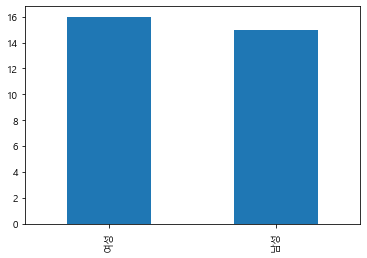

In [12]:
df_count = df_fitness['GENDER'].value_counts()
df_count.plot.bar()

<AxesSubplot:>

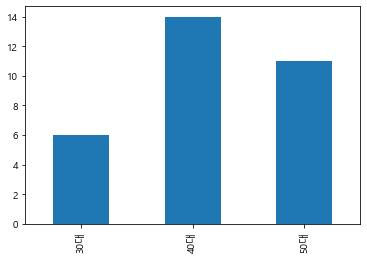

In [13]:
df_count = df_fitness['AGEGROUP'].value_counts()
df_count.sort_index(inplace = True)
df_count.plot.bar()

<AxesSubplot:xlabel='GENDER,AGEGROUP'>

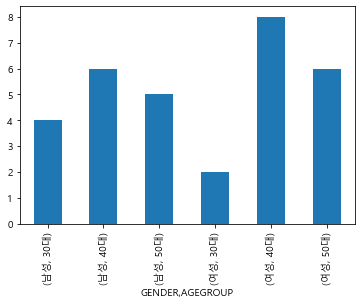

In [14]:
df_groupby_total = df_fitness.groupby(['GENDER', 'AGEGROUP']).size()
df_groupby_total.plot.bar()

<AxesSubplot:xlabel='AGEGROUP', ylabel='count'>

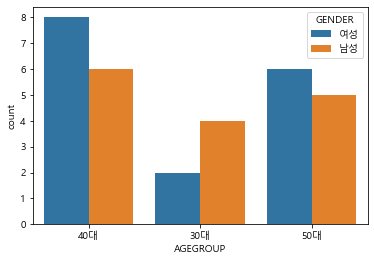

In [15]:
sns.countplot(x = 'AGEGROUP', hue = 'GENDER', data = df_fitness)

### histogram

<AxesSubplot:>

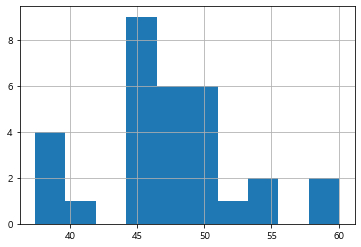

In [16]:
df_fitness['OXY'].hist()

array([[<AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'WEIGHT'}>,
        <AxesSubplot:title={'center':'OXY'}>],
       [<AxesSubplot:title={'center':'RUNTIME'}>,
        <AxesSubplot:title={'center':'RUNPULSE'}>,
        <AxesSubplot:title={'center':'RSTPULSE'}>],
       [<AxesSubplot:title={'center':'MAXPULSE'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

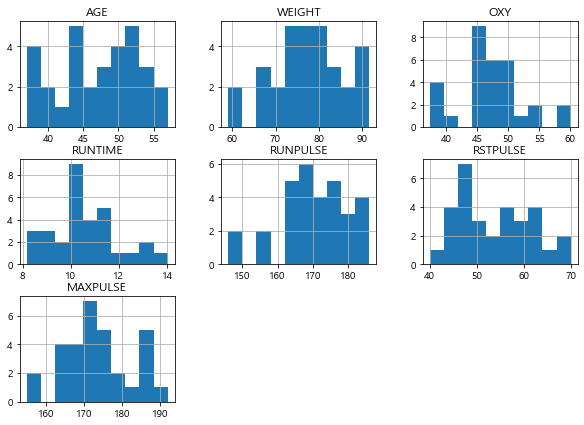

In [18]:
df_fitness.hist(figsize=(10, 7))

array([<AxesSubplot:title={'center':'남성'}>,
       <AxesSubplot:title={'center':'여성'}>], dtype=object)

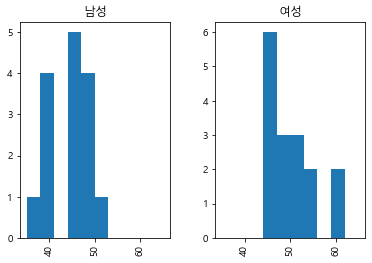

In [21]:
df_fitness.hist(column = 'OXY', by = 'GENDER', range=(35, 65))

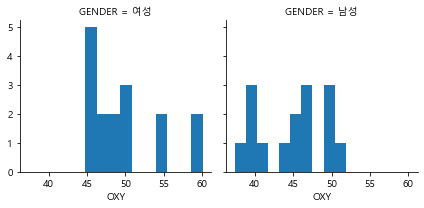

In [22]:
grid = sns.FacetGrid(df_fitness, col = 'GENDER')
grid.map(plt.hist, 'OXY')

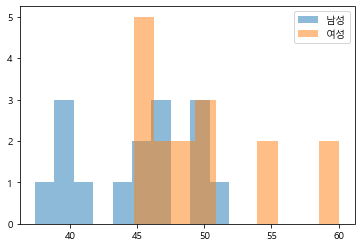

In [25]:
plt.hist(df_fitness[df_fitness['GENDER']=='남성']['OXY'], label = '남성', alpha = 0.5)
plt.hist(df_fitness[df_fitness['GENDER']=='여성']['OXY'], label = '여성', alpha = 0.5)
plt.legend()

(array([4., 1., 0., 9., 6., 6., 1., 2., 0., 2.]),
 array([37.388 , 39.6547, 41.9214, 44.1881, 46.4548, 48.7215, 50.9882,
        53.2549, 55.5216, 57.7883, 60.055 ]),
 <BarContainer object of 10 artists>)

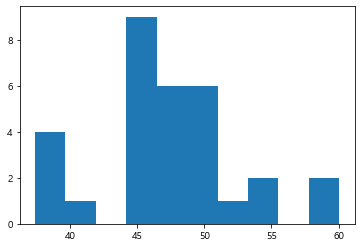

In [26]:
plt.hist(x = 'OXY', data = df_fitness)

(array([1., 3., 0., 1., 0., 0., 5., 4., 4., 2., 2., 4., 1., 0., 1., 1., 0.,
        0., 0., 2.]),
 array([37.388  , 38.52135, 39.6547 , 40.78805, 41.9214 , 43.05475,
        44.1881 , 45.32145, 46.4548 , 47.58815, 48.7215 , 49.85485,
        50.9882 , 52.12155, 53.2549 , 54.38825, 55.5216 , 56.65495,
        57.7883 , 58.92165, 60.055  ]),
 <BarContainer object of 20 artists>)

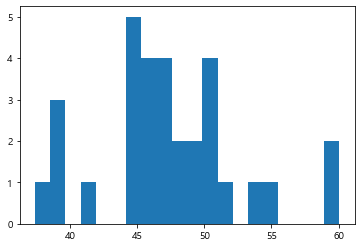

In [27]:
plt.hist(x = 'OXY', data = df_fitness, bins = 20)

### box plot

<AxesSubplot:title={'center':'OXY'}, xlabel='[GENDER, AGEGROUP]'>

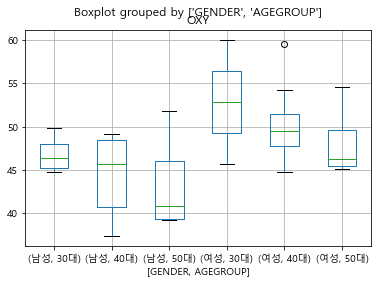

In [28]:
df_fitness.boxplot(column = 'OXY', by = ['GENDER', 'AGEGROUP'])

### pie chart

<AxesSubplot:ylabel='None'>

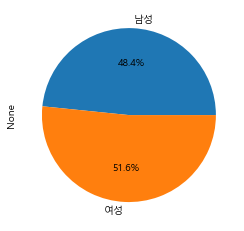

In [29]:
df_count = df_fitness.groupby(['GENDER']).size()
df_count.plot.pie(y = 'OXY', autopct = '%.1f%%')

<AxesSubplot:ylabel='None'>

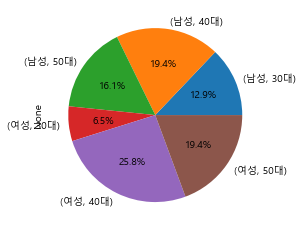

In [30]:
df_count = df_fitness.groupby(['GENDER','AGEGROUP']).size()
df_count.plot.pie(y = 'OXY', autopct = '%.1f%%')

### scatter plot

<AxesSubplot:xlabel='RUNTIME', ylabel='OXY'>

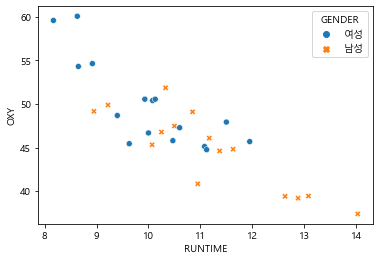

In [31]:
sns.scatterplot(x = 'RUNTIME', y = 'OXY', hue = 'GENDER', style = 'GENDER', data = df_fitness)

### scatter matrix

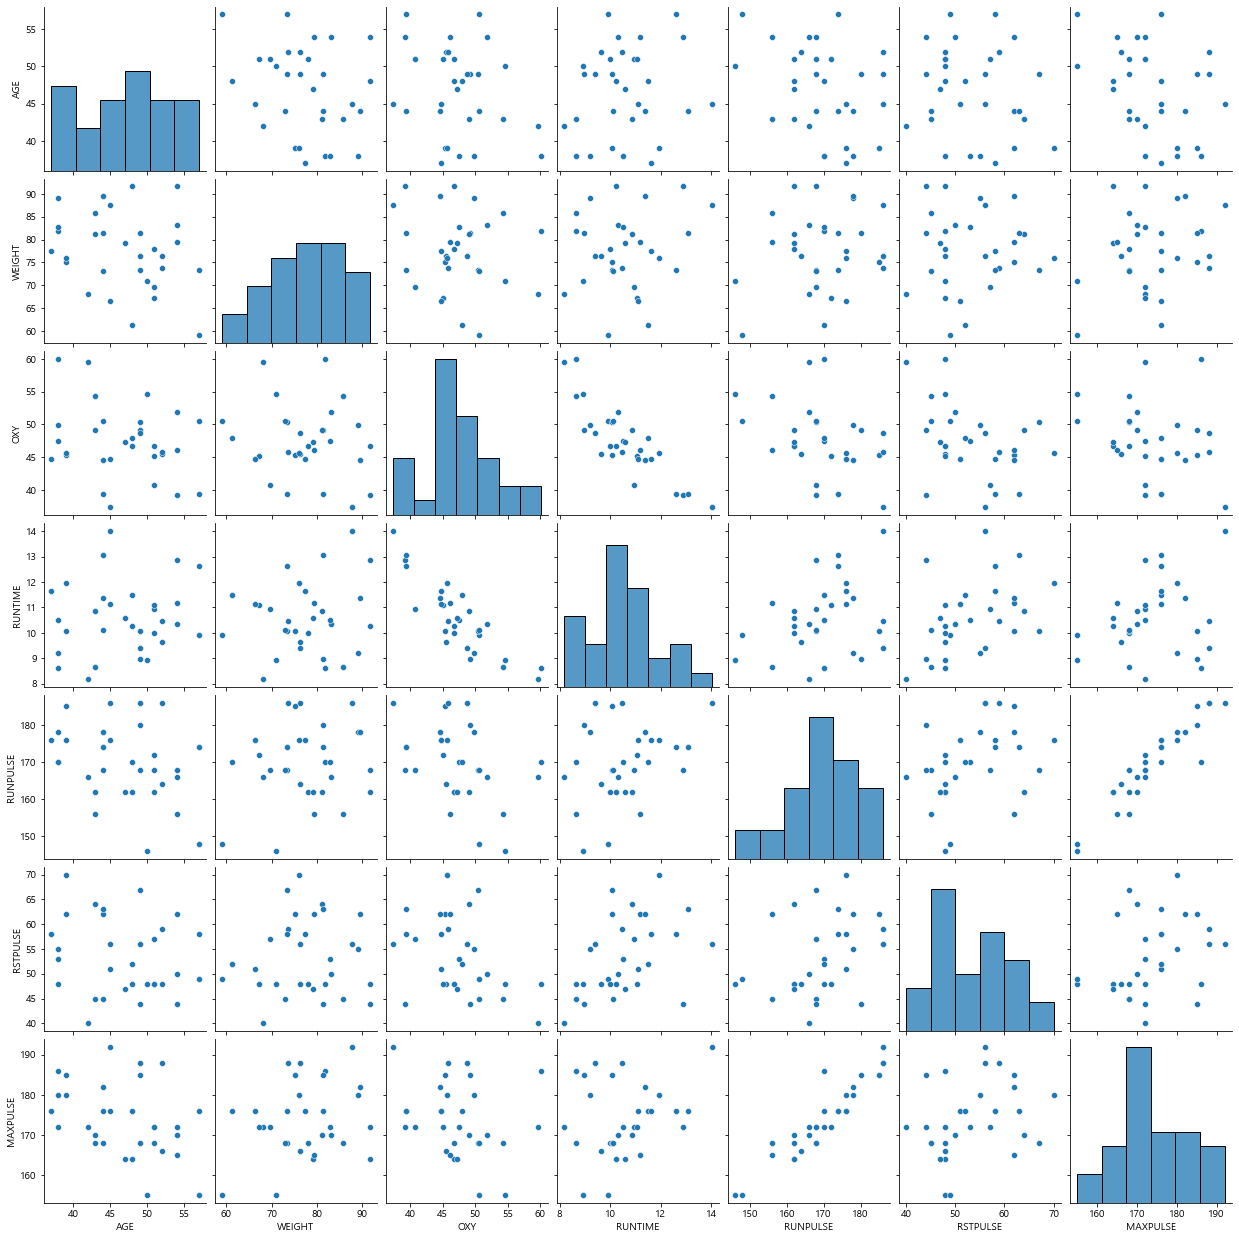

In [32]:
sns.pairplot(df_fitness)

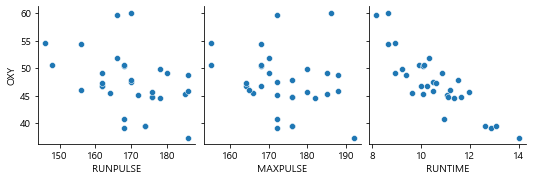

In [34]:
sns.pairplot(df_fitness, y_vars=['OXY'], x_vars = ['RUNPULSE', 'MAXPULSE', 'RUNTIME'])

### Trend chart

In [37]:
df_currency_pivot = df_currency.pivot(index = 'APPL_DATE', columns='CURRENCY',
                                     values= 'STD_RATE')
df_currency_pivot.head()

CURRENCY,CNY,JPY,USD
APPL_DATE,,,
2016-01-01,181.48,976.99,1178.0
2016-01-02,181.48,976.99,1178.0
2016-01-03,181.48,976.99,1178.0
2016-01-04,181.10,992.62,1184.0
2016-01-05,181.94,993.00,1185.0


<AxesSubplot:xlabel='APPL_DATE'>

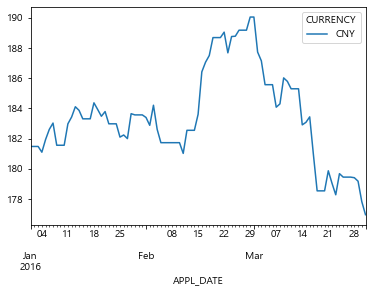

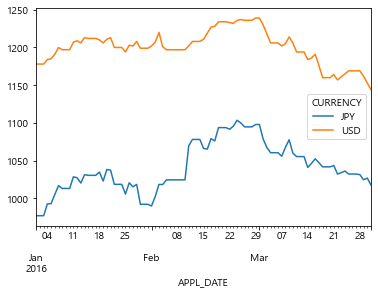

In [38]:
df_currency_pivot[['CNY']].plot()
df_currency_pivot[['JPY', 'USD']].plot()

### heatmap

In [42]:
df_agg = df_fitness.groupby(['GENDER', 'AGEGROUP'], as_index= False).agg('mean')
df_agg

,GENDER,AGEGROUP,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,남성,30대,38.000000,81.080000,46.866250,10.355000,177.250000,57.000000,178.250000
1,남성,40대,45.500000,85.465000,44.410000,11.421667,173.666667,56.166667,178.166667
2,남성,50대,54.000000,79.426000,43.476200,11.592000,166.400000,54.200000,171.000000
3,여성,30대,38.500000,78.925000,52.868000,10.290000,173.000000,59.000000,183.000000
4,여성,40대,45.875000,72.943750,50.427125,9.956250,169.000000,50.375000,172.500000
5,여성,50대,52.166667,70.856667,48.031833,10.005000,163.000000,50.000000,167.333333


In [44]:
df_pivot = df_agg.pivot('GENDER', 'AGEGROUP', 'OXY')
df_pivot

AGEGROUP,30대,40대,50대
GENDER,,,
남성,46.86625,44.410000,43.476200
여성,52.86800,50.427125,48.031833


<AxesSubplot:xlabel='AGEGROUP', ylabel='GENDER'>

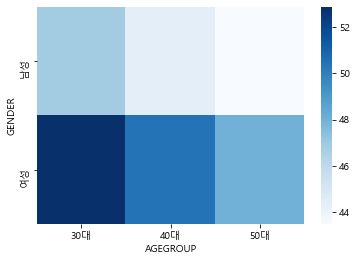

In [45]:
sns.heatmap(df_pivot, cmap= 'Blues')

In [48]:
# 피벗테이블 이용해서 그리기
df_pivot = df_agg.pivot_table(index = "GENDER", columns = "AGEGROUP", values = "OXY", aggfunc = 'mean')
df_pivot

AGEGROUP,30대,40대,50대
GENDER,,,
남성,46.86625,44.410000,43.476200
여성,52.86800,50.427125,48.031833


<AxesSubplot:xlabel='AGEGROUP', ylabel='GENDER'>

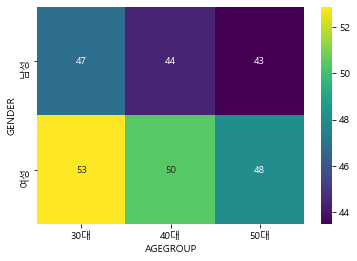

In [49]:
# heatmap(데이터, cmap: 색상)
sns.heatmap(df_pivot, annot = True, cmap="viridis")

<AxesSubplot:>

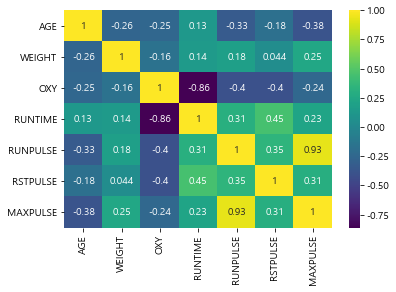

In [50]:
# 상관계수 heatmap으로 그리기
df_cor = df_fitness.corr()
sns.heatmap(df_cor, annot = True, cmap="viridis")
#annot 가 값을 표시해라

### contour plot

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='RUNTIME', ylabel='OXY'>

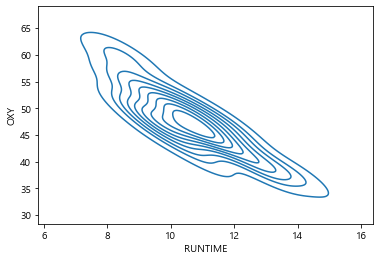

In [52]:
sns.kdeplot(df_fitness['RUNTIME'], df_fitness['OXY'], shade = False)

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='RUNTIME', ylabel='OXY'>

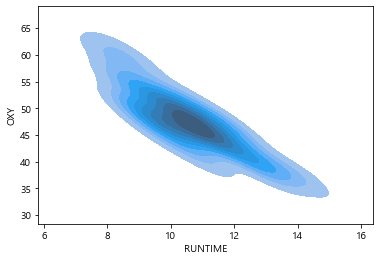

In [53]:
sns.kdeplot(df_fitness['RUNTIME'], df_fitness['OXY'], shade = True)

### parallel plot

<AxesSubplot:>

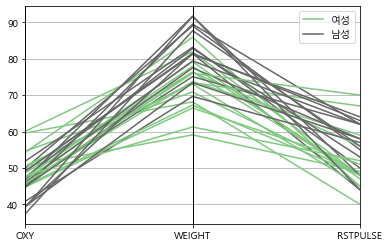

In [63]:
pd.plotting.parallel_coordinates(df_fitness, 'GENDER', cols=['OXY', 'WEIGHT','RSTPULSE']
                                 ,colormap = 'Accent')

### Customizing

Text(488.4227272727271, 0.5, '혈당 산소 요구량')

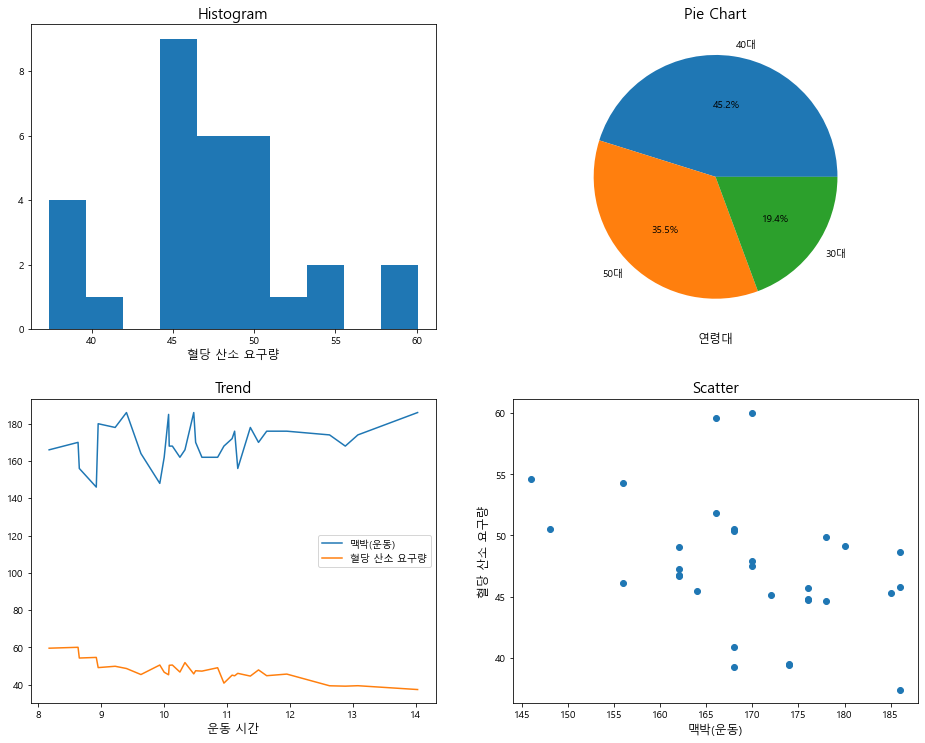

In [62]:
df_count = df_fitness["AGEGROUP"].value_counts() # Pie Chart를 위한 집계 데이터
fig, axes = plt.subplots(nrows=2, ncols=2, figsize = (13, 10)) # (2, 2) 4분할, 4개의 그래프 생성
plt.tight_layout(w_pad=5, h_pad=5) # w_pad: 열 사이 간격, h_pad: 행 사이 간격

# Histogram
axes[0,0].hist(df_fitness["OXY"]) # [0,0] 위치에 Histogram 생성
axes[0,0].set_title("Histogram", fontsize = 15) # 제목 설정, 글자 크기 15
axes[0,0].set_xlabel("혈당 산소 요구량", fontsize = 12) # x축 label 지정

# Pie Chart
axes[0,1].pie(df_count, labels = df_count.index.tolist(), autopct = "%.1f%%") # [0,1] 위치에 Pie Chart 생성
axes[0,1].set_title("Pie Chart", fontsize = 15) 
axes[0,1].set_xlabel("연령대", fontsize = 12)

# Trend
axes[1,0].plot("RUNTIME", "RUNPULSE", data = df_fitness, label = "맥박(운동)") # [1, 0]  x축: 운동 시간, y축: 맥박(운동)
axes[1,0].plot("RUNTIME", "OXY", data = df_fitness, label = "혈당 산소 요구량") # x축: 운동 시간, y축: 산소 요구량
axes[1,0].set_title("Trend", fontsize = 15)
axes[1,0].set_xlabel("운동 시간", fontsize = 12)
axes[1,0].legend() # 범례 표시

# Scatter
axes[1,1].scatter("RUNPULSE", "OXY", data = df_fitness) # [1,1] 위치에 산점도 표시, x축: 맥박(운동) , y축: 산소 요구량
axes[1,1].set_title("Scatter", fontsize = 15)
axes[1,1].set_xlabel("맥박(운동)", fontsize = 12)
axes[1,1].set_ylabel("혈당 산소 요구량", fontsize = 12)
